In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
df=pd.read_csv(r"C:\Users\Sakshi\Downloads\Students Performance.csv",header=0)

In [11]:
df S

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date
0,65,86,67,78,2021
1,64,85,71,80,2019
2,76,77,77,84,2021
3,80,76,75,75,2021
4,63,91,62,90,2019
...,...,...,...,...,...
394,85,95,74,60,2020
395,67,87,96,93,2021
396,92,81,93,64,2021
397,100,64,97,88,2021


In [12]:
df.head()


,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date
0,65,86,67,78,2021
1,64,85,71,80,2019
2,76,77,77,84,2021
3,80,76,75,75,2021
4,63,91,62,90,2019


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Math_Score       399 non-null    int64
 1   Reading_Score    399 non-null    int64
 2   Writing_Score    399 non-null    int64
 3   Placement_Score  399 non-null    int64
 4   Club_Join_Date   399 non-null    int64
dtypes: int64(5)
memory usage: 15.7 KB


In [13]:
df.describe()

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Club_Join_Date
count,399.000000,399.000000,399.000000,399.000000,399.000000
mean,79.182957,79.681704,79.167920,80.345865,2019.481203
std,11.871765,11.319323,12.039064,11.452356,1.115907
min,60.000000,60.000000,60.000000,60.000000,2018.000000
25%,69.000000,70.000000,68.000000,71.000000,2018.000000
50%,79.000000,80.000000,78.000000,80.000000,2019.000000
75%,90.000000,89.000000,90.000000,89.000000,2020.000000
max,100.000000,100.000000,100.000000,100.000000,2021.000000


In [14]:
df.isnull().sum()

Math_Score         0
Reading_Score      0
Writing_Score      0
Placement_Score    0
Club_Join_Date     0
dtype: int64

<Axes: >

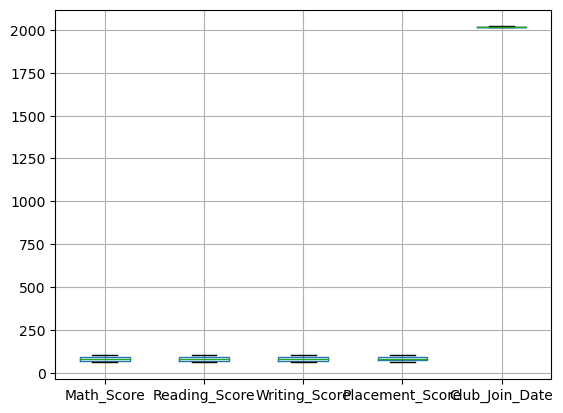

In [15]:
df.boxplot() #to check the data has outliars or not #score and joindate has diffrent parameters eg:not score more then 100
#but in joinning date is 2019 to 2021 that the reason we are seening boxplot like this

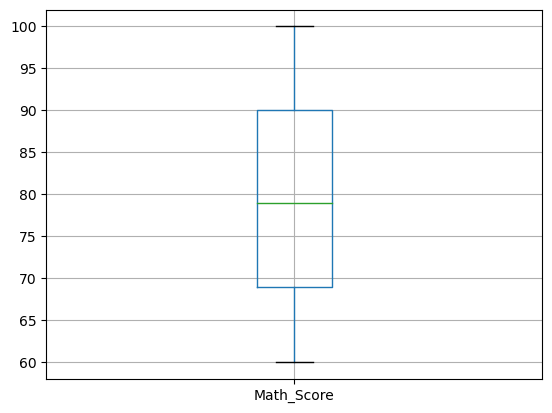

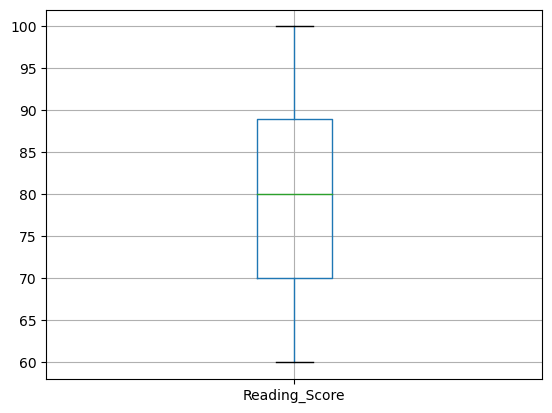

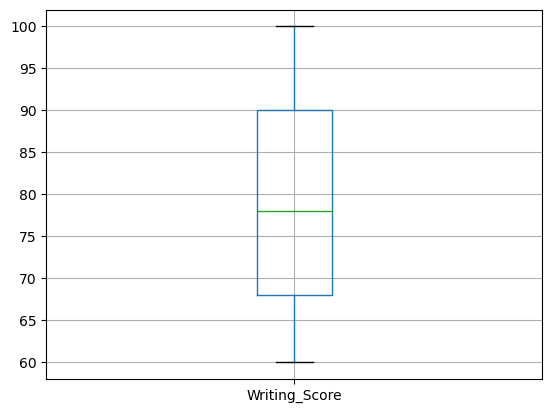

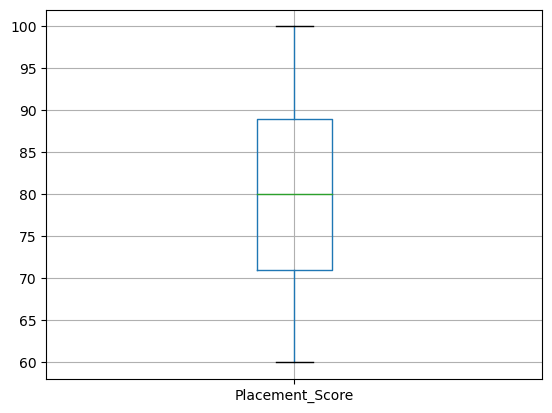

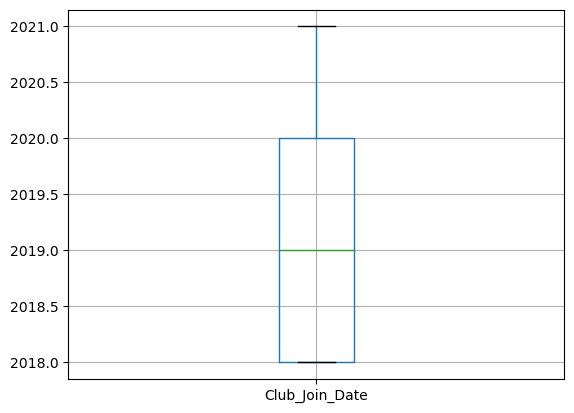

In [16]:
#check using boxplot.
for i in df.columns:
    df.boxplot(column=i)
    plt.show()  #to check boxplot always use this code 

In [17]:
df.columns

Index(['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score',
       'Club_Join_Date'],
      dtype='object')

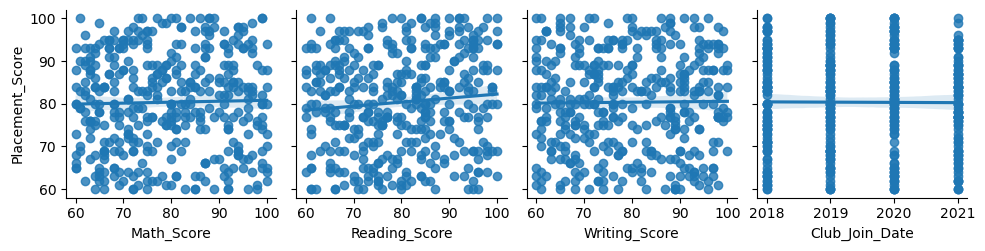

In [22]:
sns.pairplot(df,x_vars=['Math_Score', 'Reading_Score', 'Writing_Score','Club_Join_Date'],
            y_vars=['Placement_Score'],kind="reg")
plt.show() #relation between year of exp v/s salary shows lineraty

In [23]:
# if Y varibale is between the data set-->
#X = df.drop("Placement_Score")
#Y = df["Placement_Score"]

KeyError: "['Placement_Score'] not found in axis"

In [50]:
X=df.loc[:,['Math_Score', 'Reading_Score', 'Writing_Score']]
Y=df.loc[:,["Placement_Score"]]

In [51]:
print(X.shape)

(399, 3)


In [52]:
print(Y.shape)

(399, 1)


In [53]:
print(X)
print(Y)

     Math_Score  Reading_Score  Writing_Score
0            65             86             67
1            64             85             71
2            76             77             77
3            80             76             75
4            63             91             62
..          ...            ...            ...
394          85             95             74
395          67             87             96
396          92             81             93
397         100             64             97
398          63             78             85

[399 rows x 3 columns]
     Placement_Score
0                 78
1                 80
2                 84
3                 75
4                 90
..               ...
394               60
395               93
396               64
397               88
398               93

[399 rows x 1 columns]


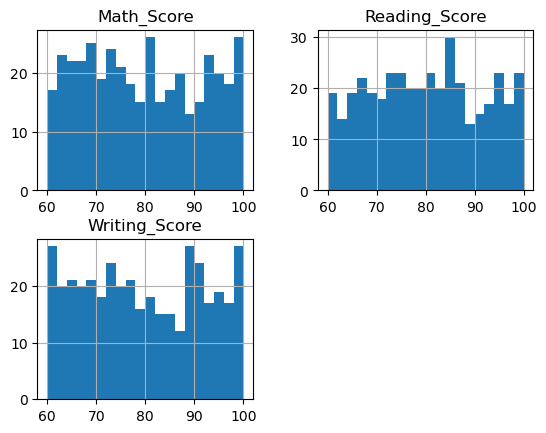

In [54]:
X.hist(bins=20)
plt.show()

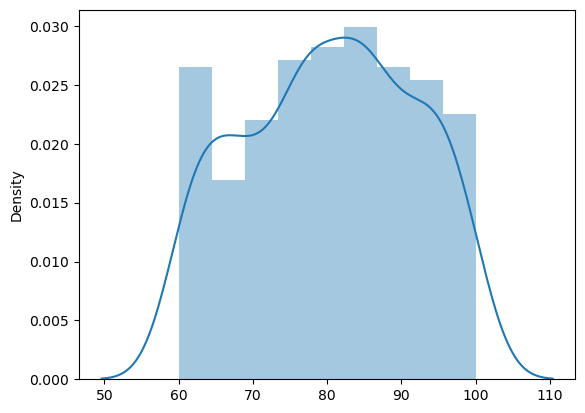

In [55]:
sns.distplot(Y)
plt.show()

In [56]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
#X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#X["newspaper"] = np.log1p(X["newspaper"])

Math_Score       0.121700
Reading_Score    0.035216
Writing_Score    0.061042
dtype: float64
Series([], dtype: float64)


               Math_Score  Reading_Score  Writing_Score
Math_Score       1.000000      -0.073645       0.130120
Reading_Score   -0.073645       1.000000      -0.005636
Writing_Score    0.130120      -0.005636       1.000000


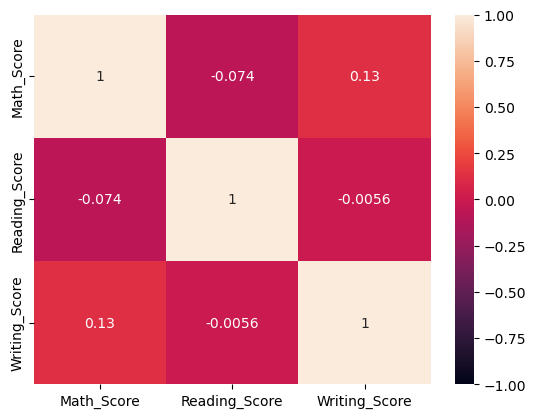

In [57]:
#Asumption of no muticollinarity: There should be no  multicollinearity
#between the independent variables
#multicollinearity is the relation amongst the multiple independent variables
corr_df=X.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1,annot=True)
plt.show()
#no highly pairs are observed so we go head with all the variables

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)
 



,features,VIF Factor
0,Math_Score,32.51
1,Reading_Score,29.61
2,Writing_Score,34.18


In [59]:
from sklearn.model_selection import train_test_split

#split the data into test and train

X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [60]:
print(X_train.shape) #train data is used for training 
print(Y_train.shape) # testing data is used for prediction
print(X_test.shape)  
print(Y_test.shape)
#print("percent of train data",x_train.shape[0]/x.shape[0]*100)

(319, 3)
(319, 1)
(80, 3)
(80, 1)


In [61]:
from sklearn.linear_model import LinearRegression
#Creat a model object
lm= LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

[67.37228255]
[[0.05044688 0.10213834 0.01427522]]


In [62]:
#predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred)

[[80.6801211 ]
 [80.91291803]
 [79.09965721]
 [82.00220258]
 [82.81877314]
 [79.99868148]
 [78.46990905]
 [80.12019693]
 [79.97360597]
 [81.77272681]
 [81.5561094 ]
 [81.11857453]
 [80.22609918]
 [81.21824223]
 [80.79912887]
 [80.51224473]
 [79.04725733]
 [79.44694487]
 [81.72197242]
 [79.44971136]
 [81.98376254]
 [81.59603332]
 [81.56245588]
 [78.6572676 ]
 [80.97447272]
 [80.97184832]
 [80.79195725]
 [83.39017585]
 [81.6131801 ]
 [80.33852018]
 [80.29618199]
 [80.4647181 ]
 [78.64756978]
 [80.02718322]
 [80.11039405]
 [83.37147699]
 [81.80348907]
 [81.97103941]
 [78.88912746]
 [79.20608396]
 [81.75441035]
 [82.15036415]
 [81.79030467]
 [78.6840373 ]
 [80.30601505]
 [82.24529384]
 [82.53964546]
 [80.67077551]
 [80.78471842]
 [80.46108942]
 [80.81172842]
 [79.06333179]
 [81.41073284]
 [80.05756308]
 [81.36137679]
 [80.30494274]
 [81.06883607]
 [80.14017055]
 [80.27418048]
 [80.41345773]
 [82.6519127 ]
 [79.92354148]
 [78.81303188]
 [80.32391894]
 [81.80791271]
 [78.34074219]
 [82.91123

In [63]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Placement_Score"]=Y_test
new_df["Predicted"]=Y_pred
new_df=new_df.reset_index().drop("index",axis=1)


In [64]:
new_df

,Math_Score,Reading_Score,Writing_Score,Placement_Score,Predicted
0,100,70,78,62,80.680121
1,70,85,93,62,80.912918
2,86,62,74,78,79.099657
3,73,96,80,97,82.002203
4,80,99,91,83,82.818773
...,...,...,...,...,...
75,76,69,98,77,79.652762
76,80,78,60,61,80.231336
77,97,70,77,68,80.514505
78,100,62,97,80,80.134244


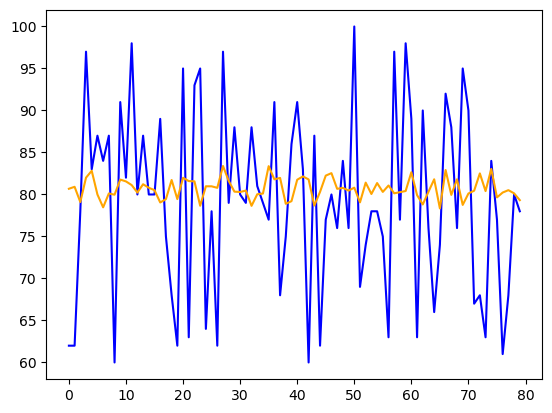

In [65]:
new_df["Placement_Score"].plot(color="blue")
new_df["Predicted"].plot(color="orange")
plt.show()
# In  pairplot their is no linearity that why our model is preforming poor #prediction model is not preforming well

In [67]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)
#R-squred value is close to 1 so it is good model
# Adj R-squared value is comparitively same as R-square so it is a good model
#RSME value is low as in Y-test of 1-25 so it is good model

R-squared: -0.02310906667638557
RMSE: 11.082032962916443
Adj R-square: -0.030879515284054415
